In [15]:
import copulae
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

from statsmodels.distributions.empirical_distribution import ECDF

In [16]:
from copulae import StudentCopula, GaussianCopula, IndepCopula
from copulae import ClaytonCopula, FrankCopula, GumbelCopula

Create the random data such that it is replicable.

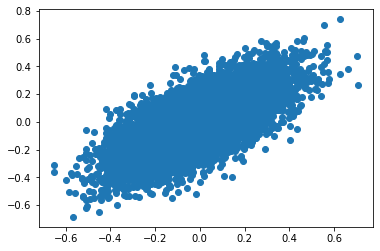

In [17]:
np.random.seed(100)

v1 = np.sort(st.norm.rvs(loc=0,scale=1.5,size=10000))
v2 = st.norm.rvs(loc=0,scale=1,size=10000)

v3 = np.sort(st.norm.rvs(loc=0,scale=1.5,size=10000))
v4 = st.norm.rvs(loc=0,scale=1,size=10000)

total_sims = pd.DataFrame([0.1*(v1+v2),0.1*(v3+v4)],index=['V1','V2']).T

plt.scatter(total_sims['V1'], total_sims['V2']);

## No Probability Integral Transform ##

Fit the copula without converting to uniformly distributed data.

In [37]:
clay_cop = ClaytonCopula(theta=1,dim=2)
clay_cop.fit(total_sims[['V1','V2']])

In [39]:
print(f"Clayton theta: {clay_cop.params}")
print(f"Clayton Kendall : {clay_cop.tau}")
print(f"Clayton LogLikihood : {clay_cop.log_lik(mv_ecdf)}")

Clayton theta: 1.201966977111111
Clayton Kendall : 0.3753839392171226
Clayton LogLikihood : 2442.710064105316


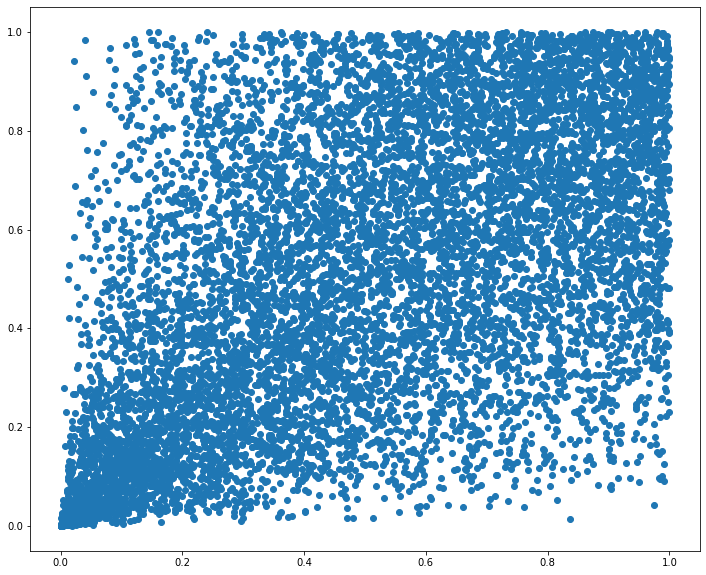

In [40]:
clay_cop_init = ClaytonCopula(theta=clay_cop.params,dim=2)
size = 10000
clayton_sim = pd.DataFrame(clay_cop_init.random(n=size,seed=5),columns=['V1','V2'])

fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.scatter(clayton_sim['V1'], clayton_sim['V2'])
plt.show()

## Test Fit with ECDF Marginals ##

Next, convert the marginal distributions to uniformly distributed via the empirical CDF function.

In [43]:
ca_ecdf = ECDF(total_sims['V1'])(total_sims['V1'])
es_ecdf = ECDF(total_sims['V2'])(total_sims['V2'])

mv_ecdf = pd.DataFrame(np.array([list(ca_ecdf),list(es_ecdf)]).T,columns=['ecdf_V1','ecdf_V2'])

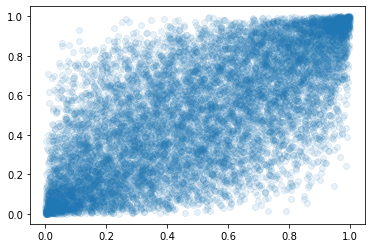

In [44]:
plt.scatter(mv_ecdf['ecdf_V1'],mv_ecdf['ecdf_V2'], alpha=0.1);

In [45]:
clay_cop_ecdf = ClaytonCopula(dim=2)
clay_cop_ecdf.fit(mv_ecdf)

print(f"Clayton theta: {clay_cop_ecdf.params}")
print(f"Clayton Kendall : {clay_cop_ecdf.tau}")
print(f"Clayton LogLikihood : {clay_cop_ecdf.log_lik(mv_ecdf)}")

Clayton theta: 1.201966977111111
Clayton Kendall : 0.3753839392171226
Clayton LogLikihood : 2442.710064105316


## Test with Same Marginals (Gumbel) ##

Convert the marginals to uniformly distributed using the gumbel CDF.

In [24]:
gumbel_ca_unif = pd.DataFrame((st.gumbel_l.cdf(total_sims['V1'],*st.gumbel_l.fit(total_sims['V1']))),columns=['gumbel_V1'])
gumbel_es_unif = pd.DataFrame((st.gumbel_l.cdf(total_sims['V2'],*st.gumbel_l.fit(total_sims['V2']))),columns=['gumbel_V2'])

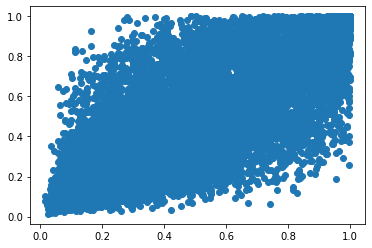

In [25]:
gumbel_unif = pd.concat([gumbel_ca_unif,gumbel_es_unif],axis=1,)

plt.scatter(gumbel_unif['gumbel_V1'],gumbel_unif['gumbel_V2']);

In [26]:
clay_cop2 = ClaytonCopula(dim=2)
clay_cop2.fit(data=gumbel_unif,verbose=0, est_var=True)

print(f"Clayton theta: {clay_cop2.params}")
print(f"Clayton Kendall : {clay_cop2.tau}")
print(f"Clayton LogLikihood : {clay_cop2.log_lik(gumbel_unif)}")

Clayton theta: 1.201966977111111
Clayton Kendall : 0.3753839392171226
Clayton LogLikihood : 2442.710064105316


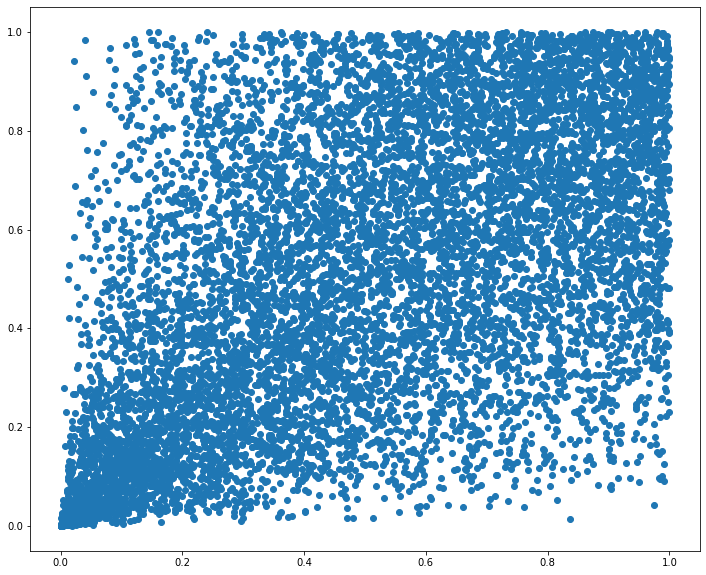

In [27]:
size = 10000
clayton_sim = pd.DataFrame(clay_cop2.random(n=size,seed=5),columns=['V1','V2'])

fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.scatter(clayton_sim['V1'], clayton_sim['V2'])
plt.show()

## Test with Different Marginals (Burr and Power Lognormal) ##

Convert the marginals to uniformly distributed using the Burr and Power Lognormal CDFs.

In [28]:
burr_ca_unif = pd.DataFrame((st.burr.cdf(total_sims['V1'],*st.burr.fit(total_sims['V1']))),columns=['burr_V1'])
powerlognorm_es_unif = pd.DataFrame((st.powerlognorm.cdf(total_sims['V2'],*st.powerlognorm.fit(total_sims['V2']))),columns=['plogn_V2'])

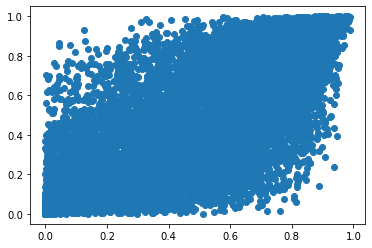

In [29]:
burr_plognorm_unif = pd.concat([burr_ca_unif,powerlognorm_es_unif],axis=1)

plt.scatter(burr_plognorm_unif['burr_V1'],burr_plognorm_unif['plogn_V2']);

In [30]:
clay_cop3 = ClaytonCopula(dim=2)
clay_cop3.fit(burr_plognorm_unif, method='ml')

print(f"Clayton theta: {clay_cop3.params}")
print(f"Clayton Kendall : {clay_cop3.tau}")
print(f"Clayton LogLikihood : {clay_cop3.log_lik(burr_plognorm_unif)}")

Clayton theta: 1.201966977111111
Clayton Kendall : 0.3753839392171226
Clayton LogLikihood : 2442.710064105316


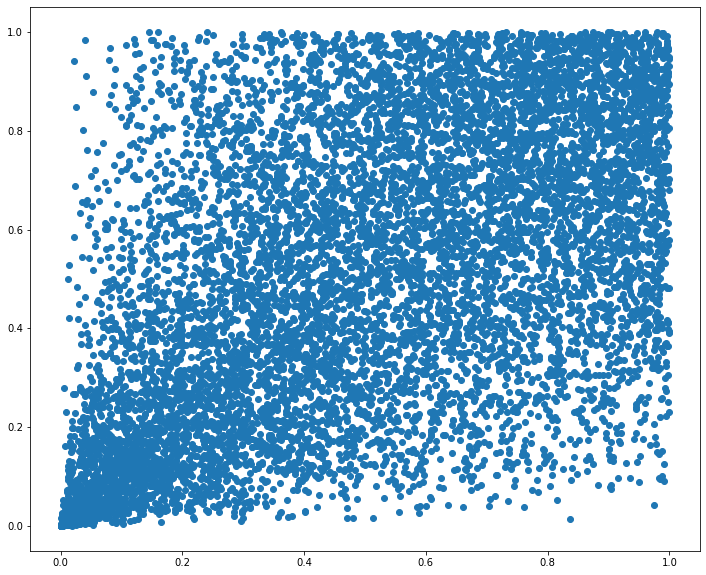

In [31]:
size = 10000
clayton_sim = pd.DataFrame(clay_cop3.random(n=size,seed=5),columns=['V1','V2'])

fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.scatter(clayton_sim['V1'], clayton_sim['V2'])
plt.show()

## Normal Marginal Distribution ##

Convert the marginals to uniformly distributed using the normal CDF.

In [32]:
norm_ca_unif = pd.DataFrame((st.norm.cdf(total_sims['V1'],*st.norm.fit(total_sims['V1']))),columns=['norm_V1'])
norm_es_unif = pd.DataFrame((st.norm.cdf(total_sims['V2'],*st.norm.fit(total_sims['V2']))),columns=['norm_V2'])

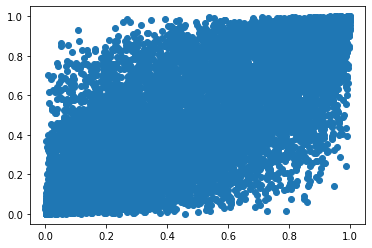

In [33]:
norm_unif = pd.concat([norm_ca_unif,norm_es_unif],axis=1)

plt.scatter(norm_unif['norm_V1'],norm_unif['norm_V2']);

In [34]:
clay_cop4 = ClaytonCopula(dim=2)
clay_cop4.fit(norm_unif, method='ml')

print(f"Clayton theta: {clay_cop4.params}")
print(f"Clayton Kendall : {clay_cop4.tau}")
print(f"Clayton LogLikihood : {clay_cop4.log_lik(norm_unif)}")

Clayton theta: 1.201966977111111
Clayton Kendall : 0.3753839392171226
Clayton LogLikihood : 2442.710064105316


## Print Probability Integral Transforms for each scenario ##

In [35]:
all_marginals = pd.concat([mv_ecdf, gumbel_unif, burr_plognorm_unif, norm_unif], axis=1)
all_marginals

,ecdf_V1,ecdf_V2,gumbel_V1,gumbel_V2,burr_V1,plogn_V2,norm_V1,norm_V2
0,0.0024,0.0004,0.036714,0.020576,4.724315e-05,0.000376,0.002564,0.000367
1,0.0095,0.0030,0.058614,0.035523,2.123286e-03,0.002484,0.010229,0.002383
2,0.0007,0.0001,0.026126,0.013463,7.568597e-07,0.000069,0.000828,0.000071
3,0.0169,0.0265,0.068455,0.084333,5.306163e-03,0.027204,0.015509,0.026714
4,0.0167,0.0070,0.068155,0.049466,5.180402e-03,0.006737,0.015332,0.006499
...,...,...,...,...,...,...,...,...
9995,0.9964,0.9957,0.999914,0.999833,9.616797e-01,0.996035,0.996972,0.996141
9996,0.9951,0.9998,0.999689,1.000000,9.557048e-01,0.999586,0.995290,0.999632
9997,0.9885,0.9987,0.997134,0.999993,9.393798e-01,0.998472,0.988500,0.998559
9998,0.9996,1.0000,1.000000,1.000000,9.812857e-01,0.999973,0.999743,0.999981


In [36]:
# all_marginals.to_excel('All_marginals.xlsx')